# COCO dataset:
 Have 40K train images and 20K test images, each image size for 640*480 px
## Download COCO api:
[COCO API](https://github.com/cocodataset/cocoapi)

In [1]:
#import libs
from __future__ import print_function
from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# Setup data paths
dataDir = 'C:/Users/Da/Desktop/cocoapi/PythonAPI/pycocotools/coco'
dataType = 'val2014'
annDir = '{}/annotations'.format(dataDir)
annZipFile = '{}/annotations_train{}.zip'.format(dataDir, dataType)
annFile = '{}/instances_{}.json'.format(annDir, dataType)
annURL = 'http://images.cocodataset.org/annotations/annotations_train{}.zip'.format(dataType)
print (annDir)
print (annFile)
print (annZipFile)
print (annURL)

C:/Users/Da/Desktop/cocoapi/PythonAPI/pycocotools/coco/annotations
C:/Users/Da/Desktop/cocoapi/PythonAPI/pycocotools/coco/annotations/instances_val2014.json
C:/Users/Da/Desktop/cocoapi/PythonAPI/pycocotools/coco/annotations_trainval2014.zip
http://images.cocodataset.org/annotations/annotations_trainval2014.zip


In [3]:
# Download data if not available
if not os.path.exists(annDir):
    os.makedirs(annDir)
if not os.path.exists(annFile):
    if not os.path.exists(annZipFile):
        print ("Downloading zipped annotations to " + annZipFile + " ...")
        with urllib.request.urlopen(annURL) as resp, open(annZipFile, 'wb') as out:
            shutil.copyfileobj(resp, out)
        print ("... done downloading.")
    print ("Unzipping " + annZipFile)
    with zipfile.ZipFile(annZipFile,"r") as zip_ref:
        zip_ref.extractall(dataDir)
    print ("... done unzipping")
print ("Will use annotations in " + annFile)

Will use annotations in C:/Users/Da/Desktop/cocoapi/PythonAPI/pycocotools/coco/annotations/instances_val2014.json


In [7]:
import os
import sys
sys.path.append('/Desktop/image-captioning/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
coco=COCO(annFile)
# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())
#list(coco.anns.values())[0]

loading annotations into memory...
Done (t=4.80s)
creating index...
index created!
loading annotations into memory...
Done (t=0.29s)
creating index...
index created!


## Plot dataset Image

http://images.cocodataset.org/val2014/COCO_val2014_000000296056.jpg


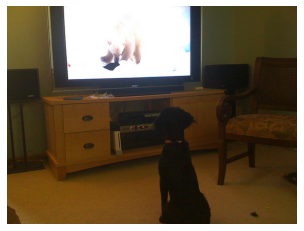

A small black dog sitting in front of a TV.
A black puppy watching TV at night time
a small dog sits in front of a television 
The dog is sitting and watching the large television.
A dog sits on the floor looking at a television screen. 


In [8]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']
# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()
# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)